<a href="https://colab.research.google.com/github/salmaan-azam/Finman/blob/main/Finman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
train = pd.read_csv('/content/gdrive/MyDrive/Finman/train_Df64byy.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Finman/test_YCcRUnU.csv')

In [ ]:
train = train.drop(columns=['ID','Region_Code'])

In [ ]:
ids = test['ID']
test = test.drop(columns=['ID','Region_Code'])

In [ ]:
train

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,C5,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,C1,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,C1,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


#### Missing Value Imputation

In [ ]:
#train['Health Indicator'].fillna('other', inplace = True)
train['Holding_Policy_Duration'].fillna('0.0', inplace = True)
train['Holding_Policy_Type'].fillna(0.0, inplace = True)

In [ ]:
train.isnull().sum()

City_Code                      0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
test['Health Indicator'].fillna('other', inplace = True)
test['Holding_Policy_Duration'].fillna('0.0', inplace = True)
test['Holding_Policy_Type'].fillna(0.0, inplace = True)

In [ ]:
# Change train['Holding_Policy_Duration'] to numbers 
# train['Holding_Policy_Duration'] = [str(i).replace('14+','14') for i in train['Holding_Policy_Duration']]
# train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].astype(float)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Accomodation_Type        50882 non-null  object 
 2   Reco_Insurance_Type      50882 non-null  object 
 3   Upper_Age                50882 non-null  int64  
 4   Lower_Age                50882 non-null  int64  
 5   Is_Spouse                50882 non-null  object 
 6   Health Indicator         50882 non-null  object 
 7   Holding_Policy_Duration  50882 non-null  object 
 8   Holding_Policy_Type      50882 non-null  float64
 9   Reco_Policy_Cat          50882 non-null  int64  
 10  Reco_Policy_Premium      50882 non-null  float64
 11  Response                 50882 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.7+ MB


In [ ]:
train['Holding_Policy_Type'] = train['Holding_Policy_Type'].astype('str')
train['Reco_Policy_Cat'] = train['Reco_Policy_Cat'].astype('str')

In [ ]:
test['Holding_Policy_Type'] = test['Holding_Policy_Type'].astype('str')
test['Reco_Policy_Cat'] = test['Reco_Policy_Cat'].astype('str')

#### Train-Test Split

In [ ]:
y = train['Response']
train = train.drop(columns='Response', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train , y, test_size=0.2)

In [ ]:
x_train.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
12764,C10,Owned,Individual,67,67,No,X2,5.0,4.0,18,19744.0
5545,C18,Rented,Individual,22,22,No,X1,NaN,nan,20,9688.0
17297,C1,Owned,Individual,75,75,No,X1,1.0,3.0,19,24662.0
31044,C10,Owned,Individual,37,37,No,NaN,9.0,3.0,18,8112.0
15379,C2,Owned,Individual,45,45,No,NaN,11.0,3.0,3,14220.0


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(40705, 11)
(40705,)
(10177, 11)
(10177,)


In [ ]:
test.shape

(21805, 11)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40705 entries, 12764 to 38139
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                40705 non-null  object 
 1   Accomodation_Type        40705 non-null  object 
 2   Reco_Insurance_Type      40705 non-null  object 
 3   Upper_Age                40705 non-null  int64  
 4   Lower_Age                40705 non-null  int64  
 5   Is_Spouse                40705 non-null  object 
 6   Health Indicator         31383 non-null  object 
 7   Holding_Policy_Duration  24508 non-null  object 
 8   Holding_Policy_Type      40705 non-null  object 
 9   Reco_Policy_Cat          40705 non-null  object 
 10  Reco_Policy_Premium      40705 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 3.7+ MB


#### Categorical Variable Encoding

In [ ]:
num_col = ['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium']
cat_col = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat']

In [ ]:
def one_hot_encode(x):
  print(f'Starting encoding for {x}')
  from sklearn.preprocessing import OneHotEncoder
  enc = OneHotEncoder(drop='first')
  a = enc.fit_transform(x_train[x].values.reshape(-1,1))
  b = enc.transform(x_val[x].values.reshape(-1,1))
  print(f'One hot encoding done for {x}')
  return a, b

In [ ]:
t1, v1 = one_hot_encode(cat_col[0])
t2, v2 = one_hot_encode(cat_col[1])
t3, v3 = one_hot_encode(cat_col[2])
t4, v4 = one_hot_encode(cat_col[3])
#t5, v5 = one_hot_encode(cat_col[4])
t6, v6 = one_hot_encode(cat_col[5])
t7, v7 = one_hot_encode(cat_col[6])
t8, v8 = one_hot_encode(cat_col[7])

Starting encoding for City_Code
One hot encoding done for City_Code
Starting encoding for Accomodation_Type
One hot encoding done for Accomodation_Type
Starting encoding for Reco_Insurance_Type
One hot encoding done for Reco_Insurance_Type
Starting encoding for Is_Spouse
One hot encoding done for Is_Spouse
Starting encoding for Holding_Policy_Duration
One hot encoding done for Holding_Policy_Duration
Starting encoding for Holding_Policy_Type
One hot encoding done for Holding_Policy_Type
Starting encoding for Reco_Policy_Cat
One hot encoding done for Reco_Policy_Cat


In [ ]:
def test_encode(x, y, z):
  from sklearn.preprocessing import OneHotEncoder
  enc = OneHotEncoder(drop='first')
  enc.fit(x[z].values.reshape(-1,1))
  b = enc.transform(y[z].values.reshape(-1,1))
  print(f'One hot encoding done for {z}')
  return b

In [ ]:
z1 = test_encode(x_train, test, cat_col[0])
z2 = test_encode(x_train, test, cat_col[1])
z3 = test_encode(x_train, test, cat_col[2])
z4 = test_encode(x_train, test, cat_col[3])
z5 = test_encode(x_train, test, cat_col[4])
z6 = test_encode(x_train, test, cat_col[5])
z7 = test_encode(x_train, test, cat_col[6])
z8 = test_encode(x_train, test, cat_col[7])

One hot encoding done for City_Code
One hot encoding done for Accomodation_Type
One hot encoding done for Reco_Insurance_Type
One hot encoding done for Is_Spouse
One hot encoding done for Health Indicator
One hot encoding done for Holding_Policy_Duration
One hot encoding done for Holding_Policy_Type
One hot encoding done for Reco_Policy_Cat


In [ ]:
def num_encoding(x):
  from sklearn.preprocessing import StandardScaler
  ss = StandardScaler()
  ss.fit(x_train[x].values.reshape(-1,1))
  a = ss.transform(x_train[x].values.reshape(-1,1))
  b = ss.transform(x_val[x].values.reshape(-1,1))
  print(f'standard scaling done for {x}')
  return a, b

In [ ]:
t9 , v9 = num_encoding(num_col[0])
t10 , v10 = num_encoding(num_col[1])
t11 , v11 = num_encoding(num_col[2])

standard scaling done for Upper_Age
standard scaling done for Lower_Age
standard scaling done for Reco_Policy_Premium


In [ ]:
def test_num_encoding(x, y, z):
  from sklearn.preprocessing import StandardScaler
  ss = StandardScaler()
  ss.fit(x[z].values.reshape(-1,1))
  b = ss.transform(y[z].values.reshape(-1,1))
  print(f'standard scaling done for {z}')
  return b

In [ ]:
z9 = test_num_encoding(x_train, test, num_col[0])
z10 = test_num_encoding(x_train, test, num_col[1])
z11 = test_num_encoding(x_train, test, num_col[2])

standard scaling done for Upper_Age
standard scaling done for Lower_Age
standard scaling done for Reco_Policy_Premium


In [ ]:
from scipy.sparse import hstack
X_train = hstack((t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11))
X_val = hstack((v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11))

In [ ]:
X_test = hstack((z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11))

In [ ]:
print(X_train.shape)
print(X_val.shape)

(40705, 90)
(10177, 90)


In [ ]:
print(X_test.shape)

(21805, 90)


# Modelling

#### Logistic Regression

  9%|▉         | 1/11 [00:00<00:05,  1.94it/s]

Linear Regression is computed for alpha = 1e-05


 27%|██▋       | 3/11 [00:00<00:02,  2.99it/s]

Linear Regression is computed for alpha = 0.0001
Linear Regression is computed for alpha = 0.001


 45%|████▌     | 5/11 [00:01<00:01,  3.87it/s]

Linear Regression is computed for alpha = 0.01
Linear Regression is computed for alpha = 0.1
Linear Regression is computed for alpha = 1


 82%|████████▏ | 9/11 [00:01<00:00,  6.18it/s]

Linear Regression is computed for alpha = 10
Linear Regression is computed for alpha = 100
Linear Regression is computed for alpha = 1000


100%|██████████| 11/11 [00:01<00:00,  7.69it/s]


Linear Regression is computed for alpha = 10000
Linear Regression is computed for alpha = 100000


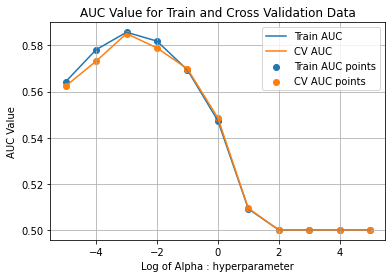

The best value of alpha =  0.001


In [ ]:
from sklearn.linear_model import SGDClassifier
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import numpy as np

train_auc = []
cv_auc = []
K = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for i in tqdm(K):
    clf = SGDClassifier(loss='log', alpha=i, class_weight="balanced")
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)    
    y_val_pred = clf.predict(X_val)
    print("Linear Regression is computed for alpha = "+str(i))
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_val, y_val_pred))


from matplotlib import pyplot as plt
plt.plot(np.log10(K), train_auc, label='Train AUC')
plt.plot(np.log10(K), cv_auc, label='CV AUC')
plt.scatter(np.log10(K), train_auc, label='Train AUC points')
plt.scatter(np.log10(K), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Log of Alpha : hyperparameter")
plt.ylabel("AUC Value")
plt.title("AUC Value for Train and Cross Validation Data")
plt.grid()
plt.show()
print("The best value of alpha = ", K[np.argmax(cv_auc)])

In [ ]:
clf = SGDClassifier(loss='log', alpha=0.001, class_weight="balanced")
clf.fit(X_train, y_train)
print(f'AUC Value for train data : {roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])}')
print(f'AUC Value for validation data : {roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])}')
print('='*50)

AUC Value for train data : 0.6244854815482831
AUC Value for validation data : 0.6220171158511539


In [ ]:
pred = pd.Series(clf.predict_proba(X_test)[:, 1], name='Response')
fy = pd.concat([ids, pred], axis=1)
fy.to_csv('/content/gdrive/MyDrive/Finman/test1.csv', index=False) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
n_estimators=[5, 10, 50, 100, 200, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators': n_estimators, 'max_depth': max_depth}
clf11 = GridSearchCV(RandomForestClassifier(),parameter, cv=4, verbose=1,scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf11.fit(X_train, y_train)  

Fitting 4 folds for each of 63 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed: 11.2min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
def heatmap(clf):
  import seaborn as sns  
  train_score = clf.cv_results_.get('mean_train_score')
  test_score = clf.cv_results_.get('mean_test_score')

  h1 = pd.DataFrame(train_score.reshape(len(max_depth), len(n_estimators)), index = max_depth, columns = n_estimators)
  plt.figure(figsize = (8,5))
  a=sns.heatmap(h1, annot=True)
  a.yaxis.set_ticklabels(a.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
  a.xaxis.set_ticklabels(a.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
  plt.ylabel('Max Depth', size=12)
  plt.xlabel('Number of Tree', size=12)
  plt.title('Heat Map of Training Score\n',size=18)

  h2 = pd.DataFrame(test_score.reshape(len(max_depth), len(n_estimators)), index = max_depth, columns = n_estimators)
  plt.figure(figsize = (8,5))
  a=sns.heatmap(h2, annot=True)
  a.yaxis.set_ticklabels(a.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
  a.xaxis.set_ticklabels(a.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
  plt.ylabel('Max Depth', size=12)
  plt.xlabel('Number of Tree', size=12)
  plt.title('Heat Map of Test Score\n',size=18)
  plt.show()
  print("The best number of tree = ", clf.best_params_.get('n_estimators'), " and best depth is : ", clf.best_params_.get('max_depth')) 

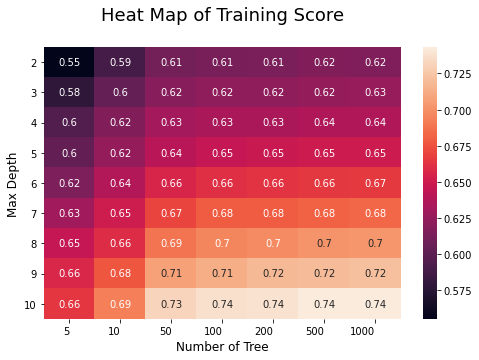

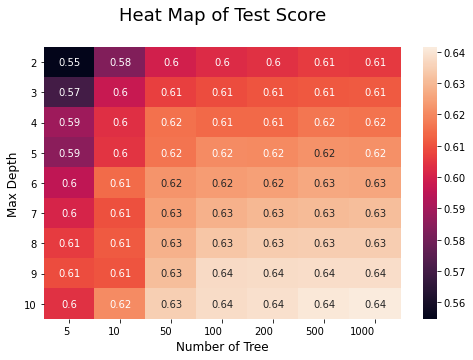

The best number of tree =  1000  and best depth is :  10


In [ ]:
heatmap(clf11)

In [ ]:
clf1 = RandomForestClassifier(n_estimators=1000, max_depth = 10, class_weight='balanced', n_jobs=-1)
clf1.fit(X_train, y_train)
print(f'AUC Value for train data : {roc_auc_score(y_train, clf1.predict_proba(X_train)[:, 1])}')
print(f'AUC Value for validation data : {roc_auc_score(y_val, clf1.predict_proba(X_val)[:, 1])}')
print('='*50)

AUC Value for train data : 0.7128186912423353
AUC Value for validation data : 0.6501144542660332


In [ ]:
pred = pd.Series(clf1.predict_proba(X_test)[:, 1], name='Response')
fy = pd.concat([ids, pred], axis=1)
fy.to_csv('/content/gdrive/MyDrive/Finman/test2.csv', index=False) 

In [ ]:
import lightgbm as lgb
clf12 = GridSearchCV(lgb.LGBMClassifier(n_jobs=-1, objective='binary', class_weight='balanced', random_seed=32),
                           parameter, cv=4, verbose=1,scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf12.fit(X_train, y_train)

Fitting 4 folds for each of 63 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:  4.2min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt',
                                      class_weight='balanced',
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_seed=32,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_job

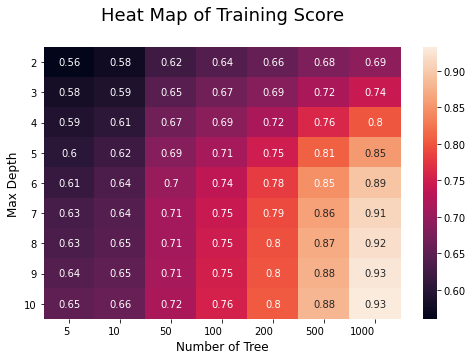

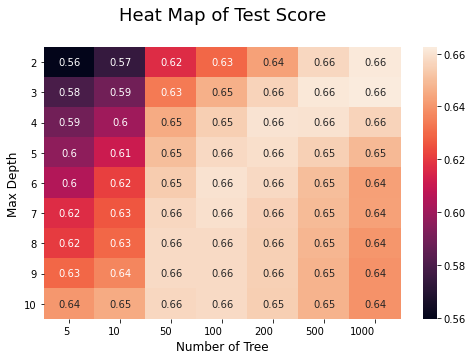

The best number of tree =  1000  and best depth is :  3


In [ ]:
heatmap(clf12)

In [ ]:
clf2 = lgb.LGBMClassifier(n_estimators=500, max_depth= 2, class_weight='balanced', objective='binary', n_jobs=-1)
clf2.fit(X_train, y_train)
print(f'AUC Value for train data : {roc_auc_score(y_train, clf1.predict_proba(X_train)[:, 1])}')
print(f'AUC Value for validation data : {roc_auc_score(y_val, clf1.predict_proba(X_val)[:, 1])}')
print('='*50)

AUC Value for train data : 0.7128186912423353
AUC Value for validation data : 0.6501144542660332


In [ ]:
pred = pd.Series(clf2.predict_proba(X_test)[:, 1], name='Response')
fy = pd.concat([ids, pred], axis=1)
fy.to_csv('/content/gdrive/MyDrive/Finman/test3.csv', index=False) 

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:478: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import dill
dill.load_session('/content/gdrive/MyDrive/Finman/prep.pkl')

In [ ]:
dill.dump_session('/content/gdrive/MyDrive/Finman/prep.pkl')

In [ ]:
X_train = X_train.todense()
X_val = X_val.todense()
X_test = X_test.todense()

In [ ]:
import tensorflow as tf
he = tf.keras.initializers.HeNormal()

In [ ]:
from keras.callbacks import ModelCheckpoint
filename="model1.hdf5"
checkpoint = ModelCheckpoint(filename, monitor='val_auc', verbose=1, save_best_only=True, mode='max')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([Dense(128, kernel_initializer=he, activation='relu', input_shape=(90,)),
                    Dense(128, kernel_initializer=he, activation='relu'), 
                    Dense(64, kernel_initializer=he, activation='relu'), 
                    Dense(32, kernel_initializer=he, activation='relu'), 
                    Dense(8, kernel_initializer=he, activation='relu'), 
                    Dense(1, activation='sigmoid'),])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy',  metrics=[['accuracy', tf.keras.metrics.AUC()]])

hist = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[checkpoint])

Epoch 1/25
1273/1273 [==============================] - 6s 4ms/step - loss: 0.5538 - accuracy: 0.7549 - auc: 0.5640 - val_loss: 0.5174 - val_accuracy: 0.7717 - val_auc: 0.6316

Epoch 00001: val_auc improved from -inf to 0.63160, saving model to model1.hdf5
Epoch 2/25
1273/1273 [==============================] - 5s 4ms/step - loss: 0.5280 - accuracy: 0.7569 - auc: 0.6489 - val_loss: 0.5134 - val_accuracy: 0.7716 - val_auc: 0.6458

Epoch 00002: val_auc improved from 0.63160 to 0.64575, saving model to model1.hdf5
Epoch 3/25
1273/1273 [==============================] - 5s 4ms/step - loss: 0.5176 - accuracy: 0.7559 - auc: 0.6786 - val_loss: 0.5075 - val_accuracy: 0.7723 - val_auc: 0.6604

Epoch 00003: val_auc improved from 0.64575 to 0.66043, saving model to model1.hdf5
Epoch 4/25
1273/1273 [==============================] - 5s 4ms/step - loss: 0.5070 - accuracy: 0.7598 - auc: 0.7017 - val_loss: 0.5079 - val_accuracy: 0.7700 - val_auc: 0.6616

Epoch 00004: val_auc improved from 0.66043 to 

In [ ]:
import keras
clf = keras.models.load_model('model1.hdf5')
print(f'AUC Value for train data : {roc_auc_score(y_train, clf.predict(X_train))}')
print(f'AUC Value for validation data : {roc_auc_score(y_val, clf.predict(X_val))}')

AUC Value for train data : 0.7555113481396805
AUC Value for validation data : 0.6622113800711457


pred = pd.Series(pd.Series(clf.predict(X_test).flatten()), name='Response')
fy = pd.concat([ids, pred], axis=1)
fy.to_csv('/content/gdrive/MyDrive/Finman/test5.csv', index=False) 